In [1]:
import os
import re
import string
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import time
 
chrome_options = Options()

browser = webdriver.Chrome(executable_path= os.getcwd()+'/chromedriver')
from pandas import *
import matplotlib.pyplot as plt
from sqlalchemy import *

from lxml import html
import requests

In [2]:
# NBA season we will be analyzing
#year = 2019
# URL page we will scraping (see image above)
url2 = "https://www.foxsports.com/nba/stats?season=2018&category=ADVANCED&group=1&sort=5&time=0&pos=0&team=0&qual=1&sortOrder=0&opp=0&page=1"
url = "https://www.basketball-reference.com/leagues/NBA_2019_per_game.html"
# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html)


# use findALL() to get the column headers
soup.findAll('tr', limit=2)
# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
print(headers)


rows = soup.findAll('tr')[1:]

player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [3]:
df = pd.DataFrame(player_stats, columns = headers)
df.dropna(how='any', inplace=True)
df.drop(['Pos','Age','G', 'GS'], axis=1, inplace = True)

In [4]:
url3 = "https://www.basketball-reference.com/leagues/NBA_2019_advanced.html"
html2 = urlopen(url3)
soup2 = BeautifulSoup(html2)


# use findALL() to get the column headers
soup2.findAll('tr', limit=2)
# use getText()to extract the text we need into a list
headers2 = [th.getText() for th in soup2.findAll('tr', limit=2)[0].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers2 = headers2[1:]
print(headers2)


rows2 = soup2.findAll('tr')[1:]

player_stats2 = [[td.getText() for td in rows2[i].findAll('td')]
            for i in range(len(rows2))]

['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '\xa0', 'OWS', 'DWS', 'WS', 'WS/48', '\xa0', 'OBPM', 'DBPM', 'BPM', 'VORP']


In [5]:
df2 = pd.DataFrame(player_stats2, columns = ['Player','Pos','Age','Tm','G','MP','PER','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','1','OWS','DWS','WS','WS/48','2','OBPM','DBPM','BPM','VORP'])
df2.dropna(how='any', inplace=True)
dftemp = df2
#df2.drop(['Pos','Age', 'G', 'MP','G','MP','PER','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','1','OWS','DWS','WS/48','2','OBPM','DBPM','BPM','VORP'], axis=1, inplace = True)
df2

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,1,OWS,DWS,WS,WS/48,2,OBPM,DBPM,BPM,VORP
0,Álex Abrines,SG,25,OKC,31,588,6.3,.507,.809,.083,...,,0.1,0.6,0.6,.053,,-2.4,-0.9,-3.4,-0.2
1,Quincy Acy,PF,28,PHO,10,123,2.9,.379,.833,.556,...,,-0.1,0.0,-0.1,-0.022,,-5.7,-0.3,-5.9,-0.1
2,Jaylen Adams,PG,22,ATL,34,428,7.6,.474,.673,.082,...,,-0.1,0.2,0.1,.011,,-3.1,-1.3,-4.4,-0.3
3,Steven Adams,C,25,OKC,80,2669,18.5,.591,.002,.361,...,,5.1,4.0,9.1,.163,,0.6,2.1,2.7,3.2
4,Bam Adebayo,C,21,MIA,82,1913,17.9,.623,.031,.465,...,,3.4,3.4,6.8,.171,,-0.6,3.6,3.0,2.4
5,Deng Adel,SF,21,CLE,19,194,2.7,.424,.639,.111,...,,-0.2,0.0,-0.2,-0.054,,-5.3,-2.0,-7.3,-0.3
6,DeVaughn Akoon-Purcell,SG,25,DEN,7,22,8.2,.322,.400,.200,...,,-0.1,0.0,0.0,-0.051,,-4.4,0.8,-3.6,0.0
7,LaMarcus Aldridge,C,33,SAS,81,2687,22.9,.576,.032,.312,...,,6.4,2.9,9.3,.167,,1.2,0.5,1.6,2.5
8,Rawle Alkins,SG,21,CHI,10,120,8.1,.418,.308,.308,...,,-0.1,0.0,-0.1,-0.042,,-4.1,-2.5,-6.5,-0.1
9,Grayson Allen,SG,23,UTA,38,416,7.5,.516,.556,.337,...,,-0.4,0.4,0.0,.002,,-3.7,-3.1,-6.8,-0.5


In [6]:
df3= pd.merge(df, df2,  how='left', left_on=['Player','Tm'], right_on = ['Player','Tm'])

df3.dropna(how='any', inplace=True)

In [7]:

df3.drop_duplicates(subset= 'Player', keep= 'first',inplace = True)

In [8]:
listx = []
for index,row in df3.iterrows():
    listx.append((row['Player']))


In [9]:
df3.dtypes

Player    object
Tm        object
MP_x      object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
Pos       object
Age       object
G         object
MP_y      object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
1         object
OWS       object
DWS       object
WS        object
WS/48     object
2         object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

In [10]:

list2 = []
for index,row in df3.iterrows():
    a = row['FG%']
    b = "0"+a
    c = float(b)
    row['FG%'] = c
    list2.append(c)

list3 = []
for index,row in df3.iterrows():
    a = row['3P%']
    b = "0"+a
    c = float(b)
    row['3P%'] = c
    list3.append(c)

list4 = []
for index,row in df3.iterrows():
    a = row['2P%']
    b = "0"+a
    c = float(b)
    row['2P%'] = c
    list4.append(c)

list5 = []
for index,row in df3.iterrows():
    a = row['eFG%']
    b = "0"+a
    c = float(b)
    row['eFG%'] = c
    list5.append(c)

list6 = []
for index,row in df3.iterrows():
    a = row['FT%']
    b = "0"+a
    c = float(b)
    row['FT%'] = c
    list6.append(c)

list7 = []
for index,row in df3.iterrows():
    a = row['TS%']
    b = "0"+a
    c = float(b)
    row['TS%'] = c
    list7.append(c)

list8 = []
for index,row in df3.iterrows():
    a = row['3PAr']
    b = "0"+a
    c = float(b)
    row['3PAr'] = c
    list8.append(c)


list9 = []
for index,row in df3.iterrows():
    a = row['ORB%']
    b = "0"+a
    c = float(b)
    row['ORB%'] = c
    list9.append(c)

list10 = []
for index,row in df3.iterrows():
    a = row['DRB%']
    b = "0"+a
    c = float(b)
    row['DRB%'] = c
    list10.append(c)

list11 = []
for index,row in df3.iterrows():
    a = row['TRB%']
    b = "0"+a
    c = float(b)
    row['TRB%'] = c
    list11.append(c)

list12 = []
for index,row in df3.iterrows():
    a = row['AST%']
    b = "0"+a
    c = float(b)
    row['AST%'] = c
    list12.append(c)

list13 = []
for index,row in df3.iterrows():
    a = row['STL%']
    b = "0"+a
    c = float(b)
    row['STL%'] = c
    list13.append(c)

list14 = []
for index,row in df3.iterrows():
    a = row['BLK%']
    b = "0"+a
    c = float(b)
    row['BLK%'] = c
    list14.append(c)

list15 = []
for index,row in df3.iterrows():
    a = row['TOV%']
    b = "0"+a
    c = float(b)
    row['TOV%'] = c
    list15.append(c)

list16 = []
for index,row in df3.iterrows():
    a = row['USG%']
    b = "0"+a
    c = float(b)
    row['USG%'] = c
    list16.append(c)

list17 = []
for index,row in df3.iterrows():
    a = row['OWS']
    str1 = '-'
    if(str1 in a):
        b = a[-3:5]
        c = float(b) * -1
    else:
        c = float(b)
    list17.append(c)
list18 = []
for index,row in df3.iterrows():
    a = row['DWS']
    str1 = '-'
    if(str1 in a):
        b = a[-3:5]
        c = float(b) * -1
    else:
        c = float(b)
    list18.append(c)

    
list19 = []
for index,row in df3.iterrows():
    a = row['WS']
    str1 = '-'
    if(str1 in a):
        b = a[-3:5]
        c = float(b) * -1
    else:
        c = float(b)
    list19.append(c)

list20 = []
for index,row in df3.iterrows():
    a = row['WS/48']
    str1 = '-'
    if(str1 in a):
        b = a[-3:5]
        c = float(b) * -1
    else:
        c = float(b)
    list20.append(c)


list21 = []
for index,row in df3.iterrows():
    a = row['OBPM']
    str1 = '-'
    if(str1 in a):
        b = a[-3:5]
        c = float(b) * -1
    else:
        c = float(b)
    list21.append(c)

    
list22 = []
for index,row in df3.iterrows():
    a = row['DBPM']
    str1 = '-'
    if(str1 in a):
        b = a[-3:5]
        c = float(b) * -1
    else:
        c = float(b)
    list22.append(c)

list23 = []
for index,row in df3.iterrows():
    a = row['BPM']
    str1 = '-'
    if(str1 in a):
        b = a[-3:5]
        c = float(b) * -1
    else:
        c = float(b)
    list23.append(c)

list24 = []
for index,row in df3.iterrows():
    a = row['VORP']
    str1 = '-'
    if(str1 in a):
        b = a[-3:5]
        c = float(b) * -1
    else:
        c = float(b)
    list24.append(c)

    

In [11]:
listz =[]
listza = []
for index,row in df3.iterrows():
    a = row['Tm']
    listz.append(a)
    if(len(a) > 0):
        listza.append(a)
print(len(listza))
print(len(listz))

530
530


In [12]:
df3.dtypes

Player    object
Tm        object
MP_x      object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
Pos       object
Age       object
G         object
MP_y      object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
1         object
OWS       object
DWS       object
WS        object
WS/48     object
2         object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

In [13]:
df3.drop(['Player','Tm','FG%', '3P%','2P%', 'eFG%','FT%','TS%','3PAr', 'FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','1','2','OWS','DWS','WS','WS/48','OBPM','DBPM','BPM','VORP'], axis=1, inplace = True)

In [14]:
df3['MP_x'] = df3['MP_x'].astype(float)
df3['FG'] = df3['FG'].astype(float)
df3['FGA'] = df3['FGA'].astype(float)
#df['FG%'] =  df3['FGA'].astype(float)
df3['3P'] = df3['3P'].astype(float)
df3['3PA'] = df3['3PA'].astype(float)


df3['2P'] = df3['2P'].astype(float)
df3['2PA'] = df3['2PA'].astype(float)
#df['2P%'].astype(float)
#df['eFG%'].astype(float)
df3['FT'] = df3['FT'].astype(float)
df3['FTA'] = df3['FTA'].astype(float)
#df['FT%'].astype(float)
df3['ORB'] = df3['ORB'].astype(float)
df3['DRB'] = df3['DRB'].astype(float)
df3['TRB'] = df3['TRB'].astype(float)
df3['AST'] = df3['AST'].astype(float)
df3['STL'] = df3['STL'].astype(float)
df3['BLK'] = df3['BLK'].astype(float)
df3['TOV'] = df3['TOV'].astype(float)
df3['PF'] = df3['PF'].astype(float)
df3['PTS'] = df3['PTS'].astype(float)


df3['PER'] = df3['PER'].astype(float)
#df3['TS%'].astype(float)
#df3['3PAr'].astype(float)
#df['FTr'].astype(float)
#df['ORB%'].astype(float)
#df['DRB%'].astype(float)
#df['TRB%'].astype(float)
#df['AST%'].astype(float)
#df['STL%'].astype(float)
#df['BLK%'].astype(float)
#df['TOV%'].astype(float)
#df['USG%'].astype(float)
#df['OWS'].astype(float)
#df['DWS'].astype(float)
#df['WS'].astype(float)
#df['WS/48'].astype(float)
#df['OBPM'].astype(float)
#df['DBPM'].astype(float)
#df['BPM'].astype(float)
#df['VORP'].astype(float)


df3.dtypes

MP_x    float64
FG      float64
FGA     float64
3P      float64
3PA     float64
2P      float64
2PA     float64
FT      float64
FTA     float64
ORB     float64
DRB     float64
TRB     float64
AST     float64
STL     float64
BLK     float64
TOV     float64
PF      float64
PTS     float64
Pos      object
Age      object
G        object
MP_y     object
PER     float64
dtype: object

In [15]:
df3.insert(loc=19, column='FG%', value=list2)
df3.insert(loc=20, column='3P%', value=list3)
df3.insert(loc=21, column='2P%', value=list4)
df3.insert(loc=22, column='eFG%', value=list5)
df3.insert(loc=23, column='FT%', value=list6)
df3.insert(loc=24, column='TS%', value=list7)
df3.insert(loc=25, column='3PAr', value=list8)
df3.insert(loc=26, column='ORB%', value=list9)
df3.insert(loc=27, column='DRB%', value=list10)
df3.insert(loc=28, column='TRB%', value=list11)
df3.insert(loc=29, column='AST%', value=list12)
df3.insert(loc=30, column='STL%', value=list13)
df3.insert(loc=31, column='BLK%', value=list14)
df3.insert(loc=32, column='TOV%', value=list15)
df3.insert(loc=33, column='OWS%', value=list16)
df3.insert(loc=34, column='DWS', value=list17)
df3.insert(loc=35, column='WS', value=list18)
df3.insert(loc=35, column='WS/48', value=list19)
df3.insert(loc=36, column='OBPM', value=list20)
df3.insert(loc=37, column='DBPM', value=list21)
df3.insert(loc=38, column='BPM', value=list22)
df3.insert(loc=39, column='VORP', value=list23)



In [16]:
df3.dtypes

MP_x     float64
FG       float64
FGA      float64
3P       float64
3PA      float64
2P       float64
2PA      float64
FT       float64
FTA      float64
ORB      float64
DRB      float64
TRB      float64
AST      float64
STL      float64
BLK      float64
TOV      float64
PF       float64
PTS      float64
Pos       object
FG%      float64
3P%      float64
2P%      float64
eFG%     float64
FT%      float64
TS%      float64
3PAr     float64
ORB%     float64
DRB%     float64
TRB%     float64
AST%     float64
STL%     float64
BLK%     float64
TOV%     float64
OWS%     float64
DWS      float64
WS/48    float64
OBPM     float64
DBPM     float64
BPM      float64
VORP     float64
WS       float64
Age       object
G         object
MP_y      object
PER      float64
dtype: object

In [17]:
df3.drop(['Pos','Age','G', 'MP_y'], axis=1, inplace = True)

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


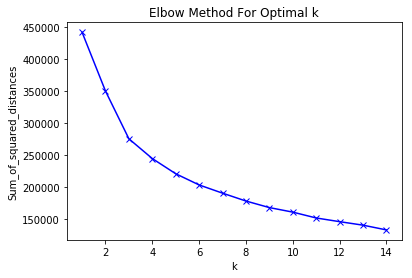

In [49]:
mms = MinMaxScaler()
mms.fit(df3)
data_transformed = mms.transform(df3)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df3)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [48]:
df3.drop(["Player","Role"],axis = 1,inplace = True)

In [27]:
from sklearn.mixture import GaussianMixture as GMM

In [30]:
df3.drop(['Player','Role'],axis = 1,inplace = True)

In [40]:
count = 0
for i in df3.columns:
    print(i)

MP_x
FG
FGA
3P
3PA
2P
2PA
FT
FTA
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
FG%
3P%
2P%
eFG%
FT%
TS%
3PAr
ORB%
DRB%
TRB%
AST%
STL%
BLK%
TOV%
OWS%
DWS
WS/48
OBPM
DBPM
BPM
VORP
WS
PER


In [31]:
gmm = GMM(n_components=5).fit(df3)
labels = gmm.predict_proba(df3)
print((labels))


[[0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 3.68241239e-157 1.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 5.41200900e-042 7.17850975e-059 1.00000000e+000
  0.00000000e+000]
 ...
 [0.00000000e+000 1.90206340e-096 1.00000000e+000 9.84050851e-036
  0.00000000e+000]
 [0.00000000e+000 1.10887678e-042 1.00000000e+000 3.45391002e-038
  0.00000000e+000]
 [0.00000000e+000 1.81149727e-044 1.00000000e+000 1.24046258e-057
  0.00000000e+000]]


In [42]:
count1 = 0
count2 = 0
for i in range(len(labels)):
    for j in range(len(labels[i])):
        if(labels[i][j] > 0.01):
            count1 +=1
        if(labels[i][j] > 0.1):
            count2+= 1
print(count1,count2)
print(len(labels))

539 532
530


In [43]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(df3)


labels = kmeans.predict(data_transformed)
print(type(labels))
print(len(labels))
print(len(df3))


<class 'numpy.ndarray'>
530
530


In [44]:
df3

,MP_x,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,...,TOV%,OWS%,DWS,WS/48,OBPM,DBPM,BPM,VORP,WS,PER
0,19.0,1.8,5.1,1.3,4.1,0.5,1.0,0.4,0.4,0.2,...,7.9,12.2,20.3,0.5,0.2,-2.4,-0.9,-3.4,0.6,6.3
1,12.3,0.4,1.8,0.2,1.5,0.2,0.3,0.7,1.0,0.3,...,15.2,9.2,-0.1,-0.1,-2.0,-5.7,-0.3,-5.9,0.6,2.9
2,12.6,1.1,3.2,0.7,2.2,0.4,1.1,0.2,0.3,0.3,...,19.7,13.5,-0.1,0.1,2.0,-3.1,-1.3,-4.4,0.6,7.6
3,33.4,6.0,10.1,0.0,0.0,6.0,10.1,1.8,3.7,4.9,...,12.6,16.4,0.1,0.1,2.0,3.1,1.3,4.4,0.6,18.5
4,23.3,3.4,5.9,0.0,0.2,3.4,5.7,2.0,2.8,2.0,...,17.1,15.8,0.1,0.1,2.0,-0.6,1.3,4.4,0.6,17.9
5,10.2,0.6,1.9,0.3,1.2,0.3,0.7,0.2,0.2,0.2,...,13.7,9.9,-0.2,-0.2,-5.0,-5.3,-2.0,-7.3,0.6,2.7
6,3.1,0.4,1.4,0.0,0.6,0.4,0.9,0.1,0.3,0.1,...,15.5,25.0,-0.1,0.2,-5.0,-4.4,2.0,-3.6,0.6,8.2
7,33.2,8.4,16.3,0.1,0.5,8.3,15.8,4.3,5.1,3.1,...,8.8,26.9,0.1,0.2,5.0,4.4,2.0,3.6,0.6,22.9
8,12.0,1.3,3.9,0.3,1.2,1.0,2.7,0.8,1.2,1.1,...,15.3,19.0,-0.1,-0.1,-4.0,-4.1,-2.5,-6.5,0.6,8.1
9,10.9,1.8,4.7,0.8,2.6,0.9,2.1,1.2,1.6,0.1,...,13.9,24.4,-0.4,0.1,4.0,-3.7,-3.1,-6.8,0.6,7.5


In [45]:
df3.insert(loc=0, column='Player', value=listx)
df3.insert(loc=1, column='Role', value=labels)

In [24]:
dfa = df3[['Player','Role','MP_x','PER']]
dfa

,Player,Role,MP_x,PER
0,Álex Abrines,4,19.0,6.3
1,Quincy Acy,4,12.3,2.9
2,Jaylen Adams,4,12.6,7.6
3,Steven Adams,2,33.4,18.5
4,Bam Adebayo,0,23.3,17.9
5,Deng Adel,4,10.2,2.7
6,DeVaughn Akoon-Purcell,4,3.1,8.2
7,LaMarcus Aldridge,2,33.2,22.9
8,Rawle Alkins,4,12.0,8.1
9,Grayson Allen,4,10.9,7.5


In [25]:
dfa.to_csv('roles1.csv')

In [ ]:
url7 = 'https://stats.nba.com/players/traditional/?sort=PLAYER_NAME&dir=-1&Season=2018-19&SeasonType=Regular%20Season'
browser.get(url7)

In [ ]:
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')

In [ ]:
general = []
player8 = []
players8 = []
for line_id, lines in enumerate(table.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            general.append(temp)
            
        temp2 = re.findall("\D+", lines)
        player8.append(temp2)

print(len(player8))
players_e = player8[1061:1591]
for i in players_e:
    players8.append(''.join(i))

db_general = pd.DataFrame(general)
db_general.columns = ['Age','GP','W','L','MIN', 'PTS','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','TOV','STL','BLK','PF','FP','DD2','TD3','+/-']
db_general.astype('float').dtypes
db_general.drop(['Age','GP','W','L','MIN', 'PTS','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','TOV','STL','BLK','PF','DD2','TD3','+/-'], axis = 1, inplace = True)
db_general.insert(0, 'Player',players8)
db_general
dictr = {}
for index,row in db_general.iterrows():
    dictr[row['Player']] = row['FP']

In [ ]:
dfz = df3[['Player','Role','MP_x','PER']]
listfp = []
for index,row in dfz.iterrows():
    if(row['Player'] not in dictr.keys()):
        dfz.drop(index, axis = 0, inplace = True)
    else:
        listfp.append(dictr.get(row['Player']))


print(listfp)


In [ ]:
df3.insert(4,'FP',listfp)


In [ ]:
df3

In [ ]:
df3.to_csv('roles1.csv')

In [ ]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0
count0 = 0

for index,row in df3.iterrows():
    if(row['Role'] == 0):
        count0 = count0+1
for index,row in df3.iterrows():
    if(row['Role'] == 1):
        count1 = count1+1
for index,row in df3.iterrows():
    if(row['Role'] == 2):
        count2 = count2+1
for index,row in df3.iterrows():
    if(row['Role'] == 3):
        count3 = count3+1
for index,row in df3.iterrows():
    if(row['Role'] == 4):
        count4 = count4+1
for index,row in df3.iterrows():
    if(row['Role'] == 5):
        count5 = count5+1
for index,row in df3.iterrows():
    if(row['Role'] == 6):
        count6 = count6+1
for index,row in df3.iterrows():
    if(row['Role'] == 7):
        count7 = count7+1
for index,row in df3.iterrows():
    if(row['Role'] == 8):
        count8 = count8+1
for index,row in df3.iterrows():
    if(row['Role'] == 9):
        count9 = count9+1
for index,row in df3.iterrows():
    if(row['Role'] == 10):
        count10 = count10+1
print(count0)
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)
print(count6)
print(count7)
print(count8)
print(count9)


In [ ]:
df3

In [ ]:
from sklearn.linear_model import LinearRegression

# Create linear regression object.
mlr= LinearRegression()
X = df3[['Role']]
y = df3[['NetRtg']]
# Fit linear regression.
mlr.fit(X,y )

print(mlr.score(X,y ))


In [ ]:
for index,row in df3.iterrows():
    if(row['Player'] == 'LeBron James'):
        print(row['Role'])

for index,row in df3.iterrows():
    if(row['Player'] == 'Stephen Curry'):
        print(row['Role'])
for index,row in df3.iterrows():
    if(row['Player'] == 'James Harden'):
        print(row['Role'])
for index,row in df3.iterrows():
    if(row['Player'] == 'Giannis Antetokounmpo'):
        print(row['Role'])
for index,row in df3.iterrows():
    if(row['Player'] == 'Anthony Davis'):
        print(row['Role'])
for index,row in df3.iterrows():
    if(row['Player'] == 'Joel Embiid'):
        print(row['Role'])
for index,row in df3.iterrows():
    if(row['Player'] == 'Kyrie Irving'):
        print(row['Role'])
for index,row in df3.iterrows():
    if(row['Player'] == 'J.J. Redick'):
        print(row['Role'])


In [ ]:
url3 = 'https://stats.nba.com/lineups/advanced/?Season=2018-19&SeasonType=Regular%20Season&sort=GROUP_NAME&dir=-1'
browser.get(url3)

In [ ]:
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')

In [ ]:
lineups = []
lineup_stats = []

for line_id, lines in enumerate(table.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            lineup_stats.append(temp)
        

        temp2 = re.findall("\D+", lines)
        if(len(temp2) != 0):
            lineups.append(temp2[0])


In [ ]:
db.to_stata('lineup_data.dta')

In [ ]:
db = pd.DataFrame(lineup_stats, columns={
                       'GP': [i[0] for i in lineup_stats],
                       'Min': [i[1] for i in lineup_stats],
                       'OffRtg': [i[2] for i in lineup_stats],
                       'DefRtg': [i[3] for i in lineup_stats], 
                       'NetRtg': [i[4] for i in lineup_stats],
                       'Ast%': [i[5] for i in lineup_stats],
                       'Ast/TO': [i[6] for i in lineup_stats],
                       'Ast Ratio': [i[7] for i in lineup_stats],
                       'OREB%': [i[8] for i in lineup_stats],
                       'DREB%': [i[9] for i in lineup_stats],
                       'REB%': [i[10] for i in lineup_stats],
                       'TO RATIO': [i[11] for i in lineup_stats],
                       'EFG%': [i[12] for i in lineup_stats],
                       'TS%': [i[13] for i in lineup_stats],
                       'PACE': [i[14] for i in lineup_stats],
                       'PIE': [i[15] for i in lineup_stats]
                       })
db.astype('float').dtypes
#db3 = db

Type_new = pd.Series([]) 
  
for i in range(len(db)): 
    Type_new[i]= lineups[i]

db.insert(0, "Lineups", Type_new) 


In [ ]:
lineups1 = []
lineups2 = []
lineups3 = []
lineups4 = []
lineups5 = []
teams = []
i = 0
while(i < len(lineups)):
    
    full_lineup = lineups[i].split(",")
    lineups1.append(full_lineup[0])
    lineups2.append(full_lineup[1:2])
    lineups3.append(full_lineup[2:3])
    lineups4.append(full_lineup[3:4])
    lineups5.append(full_lineup[4:5])
    i = i+1

In [ ]:
P1 = pd.Series([]) 
P2 = pd.Series([]) 
P3 = pd.Series([]) 
P4 = pd.Series([]) 
P5 = pd.Series([]) 

for j in range(len(db)): 
    P1[j]= lineups1[j]
    P2[j] = lineups2[j][0]
    P3[j]= lineups3[j][0]
    P4[j] = lineups4[j][0]
    P5[j] = lineups5[j][0][:-4]
    

db.insert(1, "P1", P1) 
db.insert(2, "P2", P2) 
db.insert(3, "P3", P3) 
db.insert(4, "P4", P4) 
db.insert(5, "P5", P5) 

In [ ]:
listteams = []
for j in range(len(lineup_stats)):
    listteams.append(lineups5[j][0][-4:])

In [ ]:
print(len(listteams))

In [ ]:
db.insert(1,"Team",listteams)

In [ ]:
db

In [ ]:
df3.insert(1,"Team",listz)

In [ ]:
df3

In [ ]:
dictb = {}
for index,row in df3.iterrows():
    dictb[row['Player']] = row['Role']
dictb

In [ ]:
db

In [ ]:
listp1 = []
for index,row in db.iterrows():
    print(row['P1'])
        
       

In [ ]:
listp1 = []
for index,row in db.iterrows():
    temp = row['P1']
    temp2 = re.findall("\D+", temp)
    print(temp2)
       
       

In [ ]:


db2 = db[db['Lineups'].str.contains("LAL") & db['Lineups'].str.contains(r'^(?:(?!James).)*$')] 
db3 = db2[db2['Lineups'].str.contains("LAL") & db2['Lineups'].str.contains(r'^(?:(?!Rondo).)*$')] 
db4 = db[db['Lineups'].str.contains("LAL") & db['Lineups'].str.contains(r'^(?:(?!James).)*$')] 
db5 = db4[db4['Lineups'].str.contains("LAL") & db4['Lineups'].str.contains(r'^(?:(?!Ball).)*$')] 
db6 = db[db['Lineups'].str.contains("LAL") & db['Lineups'].str.contains(r'^(?:(?!Rondo).)*$')] 
db7 = db7[db6['Lineups'].str.contains("LAL") & db6['Lineups'].str.contains(r'^(?:(?!Ball).)*$')] 
print(db3['Lineups'])
#print(db5)
#print(db7)

In [ ]:
db3['NetRtg'] = db3['NetRtg'].astype(float)
db5['NetRtg'] = db5['NetRtg'].astype(float)
db7['NetRtg'] = db7['NetRtg'].astype(float)

In [ ]:
print(db3["NetRtg"].mean())
print(db5["NetRtg"].mean())
print(db7["NetRtg"].mean())

In [ ]:
print(db7['P5'])
#print(len(db5))
#print(len(db3))

In [ ]:
listball = []
listbron = []
listrondo = []
for index,row in db1.iterrows():
    if(row['Lineups'].str.contains('LeBron')):
        listbron.append(row['NetRtg'])
    if(row['Lineups'].str.contains('Ball') && row['Lineups'].contains("LeBron") && row['Lineups'].contains("Rondo")):
        listball.append(row['NetRtg'])
    if(row['Lineups'].str.contains('Rondo') && row['Lineups'].contains("Ball") && row['Lineups'].contains("LeBron")):
        listrondo.append(row['NetRtg'])


print(listball)
print(listrondo)
print(listbron)
       
    


In [ ]:
list1 = []
str1 = "James"
for row in db1.iterrows():
    row['Lineups']:
        list1.append(True)
    else:
        list1.append(False)

James = pd.Series([])




db1.insert(0, "James", list1) 
print(db1)

In [ ]:
db2.astype({'NetRtg': 'float','PIE': 'float'}).dtypes

In [ ]:
url4 = 'https://stats.nba.com/lineups/advanced/?Season=2018-19&SeasonType=Regular%20Season&sort=GROUP_NAME&dir=-1&Period=1'
url5 = 'https://stats.nba.com/lineups/advanced/?Season=2018-19&SeasonType=Regular%20Season&sort=GROUP_NAME&dir=-1&Period=2'
url6 = 'https://stats.nba.com/lineups/advanced/?Season=2018-19&SeasonType=Regular%20Season&sort=GROUP_NAME&dir=-1&Period=3'
url7 = 'https://stats.nba.com/lineups/advanced/?Season=2018-19&SeasonType=Regular%20Season&sort=GROUP_NAME&dir=-1&Period=4'
url8 = 'https://stats.nba.com/lineups/advanced/?Season=2018-19&SeasonType=Regular%20Season&sort=GROUP_NAME&dir=-1&Location=Home'
url9 = 'https://stats.nba.com/lineups/advanced/?Season=2018-19&SeasonType=Regular%20Season&sort=GROUP_NAME&dir=-1&Location=Away'

In [ ]:
db1.to_stata('data_file.dta')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans




In [ ]:
db.drop(['Lineups'], axis=1)
kmeans = KMeans(n_clusters=7)

labels = kmeans.predict(db)
centroids = kmeans.cluster_centers

In [ ]:
from sklearn.linear_model import LinearRegression

# Create linear regression object.
mlr= LinearRegression()
X = db1[['James']]
y = db1[['NetRtg']]
# Fit linear regression.
mlr.fit(X,y )

print(mlr.score(X,y ))


In [ ]:
browser.get(url4)
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table2 = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')
lineups2 = []
lineup_stats2 = []

for line_id, lines in enumerate(table2.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            lineup_stats2.append(temp)
        
        #temp2 = re.findall("\D+", lines)
        #temp3 = re.split("/w",temp2)[0]
        #lineups2.append((temp2[0]))

In [ ]:
browser.get(url5)
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table3 = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')
lineups3 = []
lineup_stats3 = []

for line_id, lines in enumerate(table3.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            lineup_stats3.append(temp)
        
        temp2 = re.findall("\D+", lines)
        #temp3 = re.split("/w",temp2)[0]
        lineups3.append(temp2)

In [ ]:
browser.get(url6)
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table4 = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')
lineups4 = []
lineup_stats4 = []

for line_id, lines in enumerate(table4.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        lineup_stats4.append(temp)
        
        temp2 = re.findall("\D+", lines)
        #temp3 = re.split("/w",temp2)[0]
        #lineups3.append(temp2)

In [ ]:
browser.get(url7)
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table5 = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')
lineups5 = []
lineup_stats5 = []

for line_id, lines in enumerate(table5.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            lineup_stats5.append(temp)        
        #temp2 = re.findall("\D+", lines)
        #temp3 = re.split("/w",temp2)[0]
        #lineups3.append(temp2)

In [ ]:
browser.get(url8)
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table6 = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')
lineups6 = []
lineup_stats6 = []

for line_id, lines in enumerate(table6.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            lineup_stats6.append(temp) 
        
        #temp2 = re.findall("\D+", lines)
        #temp3 = re.split("/w",temp2)[0]
        #lineups3.append(temp2)

In [ ]:
browser.get(url9)
browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select/option[1]').click()
table7 = browser.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[2]')
lineups7 = []
lineup_stats7 = []

for line_id, lines in enumerate(table7.text.split('\n')):
    if(line_id == 0):
        column_names = lines.split(' ')
    else:
        temp = re.findall(r"[-+]?\d*\.\d+|\d+",lines)
        if(len(temp) != 0):
            lineup_stats7.append(temp) 
        
        #temp2 = re.findall("\D+", lines)
        #temp3 = re.split("/w",temp2)[0]
        #lineups3.append(temp2)

In [ ]:
db1 = pd.DataFrame(lineup_stats2) #q1
db2 = pd.DataFrame(lineup_stats3) #q2
db3 = pd.DataFrame(lineup_stats4) #q3
db4 = pd.DataFrame(lineup_stats5) #q4
db5 = pd.DataFrame(lineup_stats6) #q5
db6 = pd.DataFrame(lineup_stats7) #q6





In [ ]:
print(db1)

In [ ]:
db1.columns = ['GP', 'Min','OffRat','DefRat','NetRat','Ast%', 'Ast/To', 'Ast Ratio', 'OREB%', "DREB%", 'REB%', 'TO Ratio', "eFG", 'TS%', 'PACE', 'PIE']
db1.astype('float').dtypes

sum = 0
counter = 0
sum2 = 0
counter2 = 0
sum3 = 0
counter3 = 0
sum4 = 0
counter4 = 0

for i in lineup_stats2:
    sum = sum+ float(i[4])
    counter = counter + 1
    
print(sum/counter)

for i in lineup_stats5:
    sum2 = sum2+ float(i[4])
    counter2 = counter2 + 1
print(sum2/counter2)

for i in lineup_stats6:
    sum3 = sum3+ float(i[4])
    counter3 = counter3 + 1
print(sum3/counter3)

for i in lineup_stats7:
    sum4 = sum4+ float(i[4])
    counter4 = counter4 + 1
print(sum4/counter4)

print(counter,counter2,counter3,counter4)